# Vũ Ngọc Chinh - S1651165

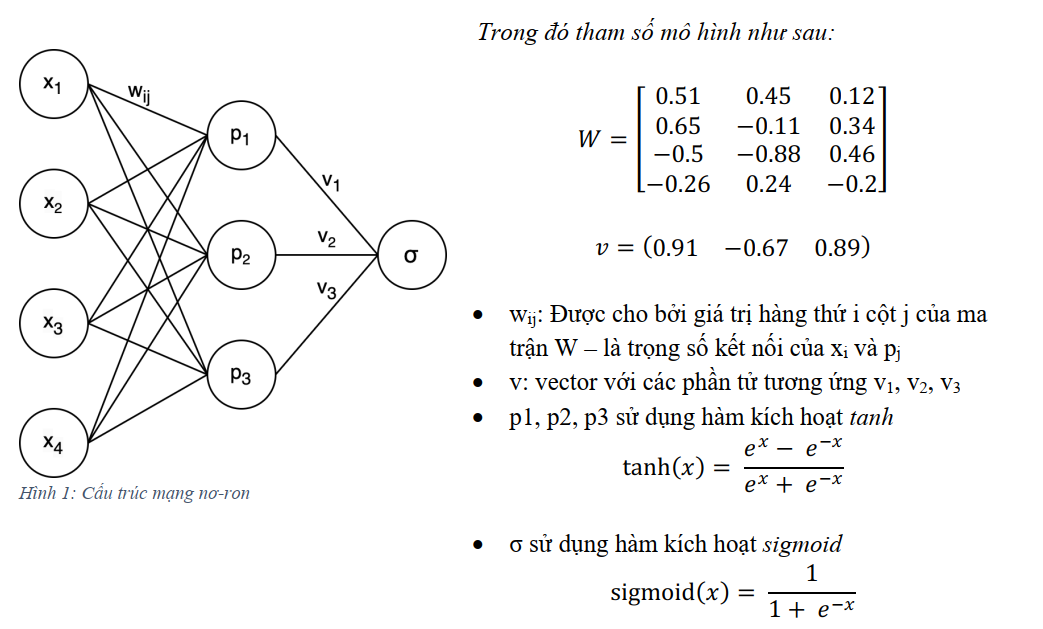


In [2]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data  = pd.read_csv('data.csv')
data.head()

,x1,x2,x3,x4,y
0,5.2,4.1,1.5,0.1,0
1,5.1,3.5,1.4,0.2,0
2,5.0,3.4,1.6,0.4,0
3,4.6,3.6,1.0,0.2,0
4,4.8,3.4,1.9,0.2,0


## Tiền xử lí


In [4]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# One-hot encoding cho các cột categorical
# categorical_features = ['Pclass', 'Sex', 'Embarked']
# data_encoded = pd.get_dummies(data, columns=categorical_features)

### 1. Min-Max Scaling

In [5]:
# Chọn các cột cần chuẩn hóa
features = ['x1', 'x2', 'x3', 'x4']

# Áp dụng Min-Max Scaling
minmax_scaler = MinMaxScaler()
# data_encoded_minmax = data_encoded.copy()
data[features] = minmax_scaler.fit_transform(data[features])

data

,x1,x2,x3,x4,y
0,0.250000,0.863636,0.121951,0.000000,0
1,0.208333,0.590909,0.097561,0.066667,0
2,0.166667,0.545455,0.146341,0.200000,0
3,0.000000,0.636364,0.000000,0.066667,0
4,0.083333,0.545455,0.219512,0.066667,0
5,0.208333,0.590909,0.097561,0.133333,0
6,0.458333,1.000000,0.121951,0.200000,0
7,0.333333,0.772727,0.170732,0.200000,0
8,0.208333,0.545455,0.121951,0.066667,0
9,0.375000,0.909091,0.097561,0.066667,0


### 2. Xác định nhãn được dự đoán bởi mô hình (mạng nơ-ron trong hình 1 làm mô hình phân lớp nhị phân)

In [18]:

# Chuyển đổi DataFrame thành mảng numpy
data_array = data[features].values
y_true = data['y'].values

# Ma trận trọng số W
W = np.array([
    [0.51, 0.45, 0.12],
    [0.65, -0.11, 0.34],
    [-0.5, -0.88, 0.46],
    [-0.26, 0.24, -0.2]
])

# Vector trọng số v
v = np.array([0.91, -0.67, 0.89])

# Hàm kích hoạt tanh
def tanh(x):
    return np.tanh(x)

# Hàm kích hoạt sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Ngưỡng xác suất
threshold = 0.5

# Dự đoán nhãn cho mỗi mẫu dữ liệu
predicted_labels = []

for x in data_array:
    # Tính toán giá trị tại lớp ẩn
    p = tanh(np.dot(x, W))
    
    # Tính toán giá trị đầu ra
    output = sigmoid(np.dot(p, v))

    print(output)
    
    # Xác định nhãn dựa trên ngưỡng xác suất
    label = 1 if output >= threshold else 0
    predicted_labels.append(label)

print(predicted_labels)


0.7087090944237584
0.6493464912629536
0.6282060914554722
0.6358206820296551
0.6496099303545697
0.6412916639075702
0.7131947872504023
0.6818968009907259
0.643645664867939
0.7082807867053484
0.5716331329252127
0.6155194718457493
0.5588940087383603
0.5269891123326216
0.597539966604748
0.5507331914218324
0.6598403509317734
0.5798924594478101
0.5702162222281959
0.5734817633149459
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


### 3. Xác định TF, TP, FP, FN, F1-Score, Accuracy, Xây dựng ma trận nhầm lẫn

In [26]:

# Tính các giá trị TP, TN, FP, FN
TP = sum((y_t == 1) and (y_p == 1) for y_t, y_p in zip(y_true, predicted_labels))
TN = sum((y_t == 0) and (y_p == 0) for y_t, y_p in zip(y_true, predicted_labels))
FP = sum((y_t == 0) and (y_p == 1) for y_t, y_p in zip(y_true, predicted_labels))
FN = sum((y_t == 1) and (y_p == 0) for y_t, y_p in zip(y_true, predicted_labels))

# # Tính Precision, Recall, F1-Score, Accuracy
# precision = TP / (TP + FP) if (TP + FP) != 0 else 0
# recall = TP / (TP + FN) if (TP + FN) != 0 else 0
# f1_score_manual = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0
# accuracy = (TP + TN) / (TP + TN + FP + FN)

accuracy_minmax = accuracy_score(y_true, predicted_labels)
precision_minmax = precision_score(y_true, predicted_labels)
recall_minmax = recall_score(y_true, predicted_labels)
f1_minmax = f1_score(y_true, predicted_labels)

# Ma trận nhầm lẫn (Confusion Matrix)
confusion_matrix = [[TN, FP], [FN, TP]]

# Hiển thị kết quả
results = {
    # "TP": TP,
    # "TN": TN,
    # "FP": FP,
    # "FN": FN,
    "Precision": precision_minmax,
    "Recall": recall_minmax,
    "F1-Score": f1_minmax,
    "Accuracy": accuracy_minmax,
    "Confusion Matrix": confusion_matrix
}

print("Kết quả đánh giá mô hình:")
for key, value in results.items():
    print(f"{key}: {value}")


Kết quả đánh giá mô hình:
Precision: 0.5
Recall: 1.0
F1-Score: 0.6666666666666666
Accuracy: 0.5
Confusion Matrix: [[0, 10], [0, 10]]


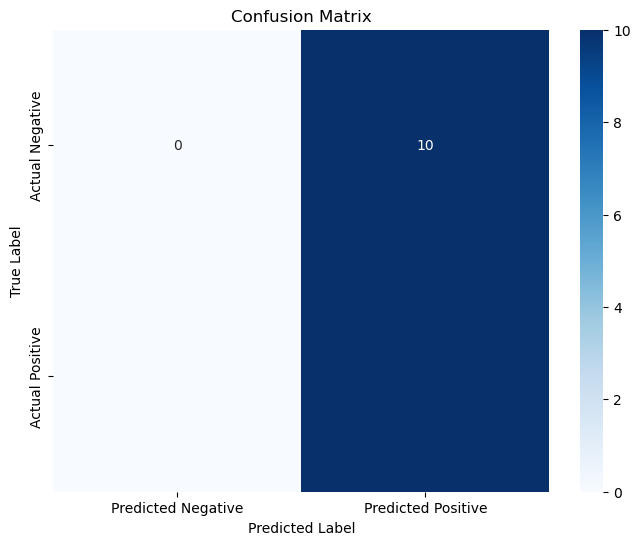

In [30]:
# Tính toán ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_true, predicted_labels)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

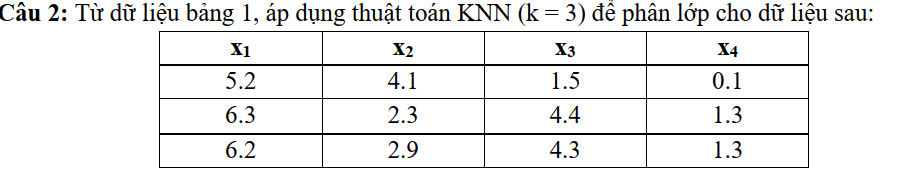

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

#điểm cần dự đoán
df_predict = pd.DataFrame({
    'x1': [5.1, 5.5, 5.5],
    'x2': [3.4, 4.2, 2.6],
    'x3': [1.5, 1.4, 4.4],
    'x4': [0.2, 0.2, 1.2]
})
df_new = data.copy()
# Áp dụng scaler đã được fit trên df để chuẩn hóa df_predict (dữ liệu cần dự đoán)
df_predict_normalized = pd.DataFrame(minmax_scaler.transform(df_predict), columns=df_predict.columns)

# Chia dữ liệu huấn luyện
X = df_new.drop('y', axis=1) 
y = df_new['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình KNN
knn = KNeighborsClassifier(n_neighbors=3)  # Số láng giềng K = 3

# Huấn luyện mô hình với dữ liệu huấn luyện
knn.fit(X_train, y_train)

# Dự đoán nhãn cho tập dữ liệu dự đoán
predictions = knn.predict(df_predict_normalized)

# In kết quả dự đoán
print(predictions)


[0 0 1]


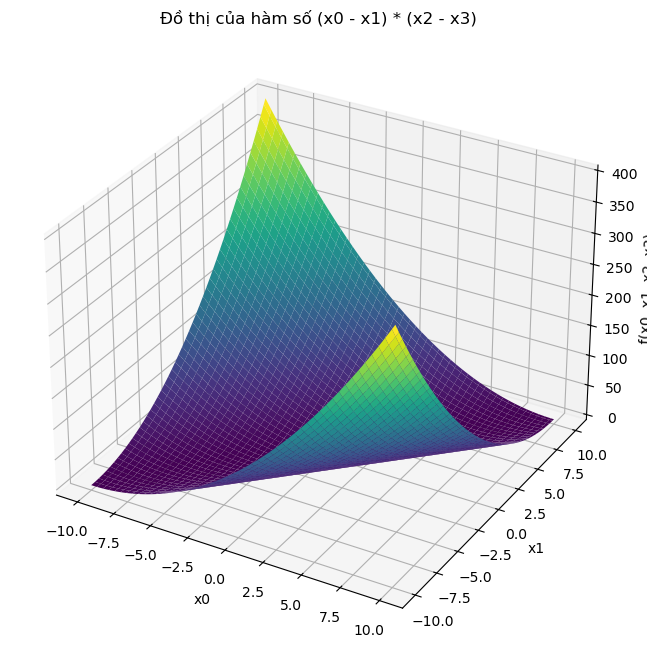

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Định nghĩa hàm
def func(x0, x1, x2, x3):
    return (x0 - x1) * (x2 - x3)

# Tạo lưới
x = np.linspace(-10, 10, 100)
X0, X1 = np.meshgrid(x, x)
X2, X3 = np.meshgrid(x, x)
Z = func(X0, X1, X2, X3)

# Vẽ đồ thị
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X0, X1, Z, cmap='viridis')

ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x0, x1, x2, x3)')
ax.set_title('Đồ thị của hàm số (x0 - x1) * (x2 - x3)')

plt.show()
